# حل عددی معادله‌ی لاپلاس  

معادله لاپلاس یکی از با اهمیت‌ترین معادلات در فیزیک است که توصیف‌ کننده‌ی رفتار حالت‌های پایدار در سامانه‌های فاقد منبع، مانند الکترواستاتیک، گرمایش پایا و جریان سیالات آرام است.
جواب معادله لاپلاس از حل معادله دیفرانسیل:

$\nabla^2 \phi = 0$

 و قرار دادن شرایط مرزی مختلف در آن به دست می‌آید.

## حل عددی معادله‌ی لاپلاس

معادله گرما را برای یک صفحه مربعی با دماهای ثابت در مرزها در نظر بگیرید.

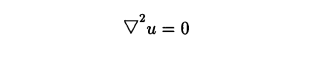

صفحه را به المان‌های کوچکی تقسیم‌‌بندی می‌کنیم.
المان‌های درونی و با گرمای نامشخص را با "؟"، المان‌های مرزی را با "+" و المان‌های گوشه صفحه را که در حل استفاده نمی‌شوند
با "-" نشان می‌دهیم.

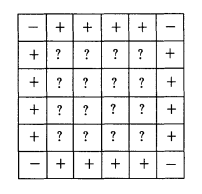

حال اگر یک المان را برداریم و به شکل زیر نامگذاری کنیم

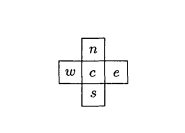

خواهیم داشت:

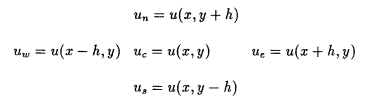

است h طول المان‌ها.

حال با اعمال بسط تیلور بر معادلات بالا خواهیم داشت:

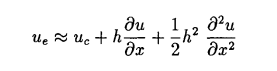
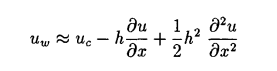

و با جمع زدن این دو معادله به شکل زیر می‌رسیم:

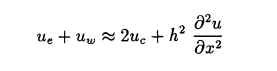

و به طور مشابه:

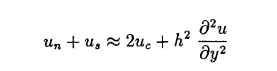

که دو جمله‌ی معادله‌ی لاپلاس در مختصات دکارتی دو بعدی در آن نمایان می‌شود. بنابراین:

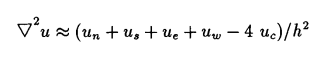

بر اساس معاله گرما و پتانسیل باید این معادله برابر صفر باشد پس:

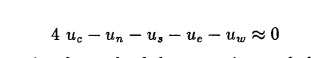

و میتوان بدست اورد که :

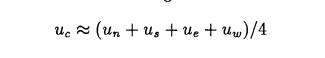

که بیانگر این است که گرما و یا پتانسیل مربوط به هر نقطه یا المان برابر میانگین دما یا پتانسیل چهار المان اطراف هست.

## مثال

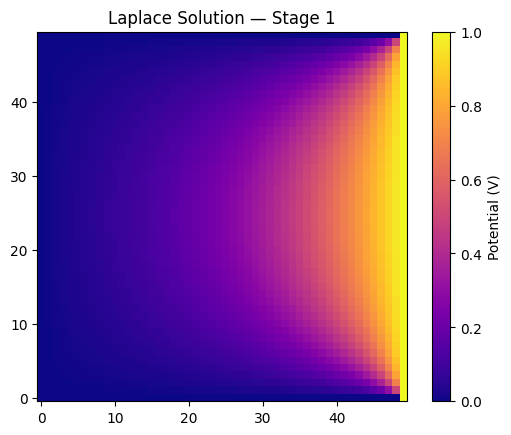

In [ ]:
#صفحه‌ای مربعی با یک ضلع دارای پتانسیل


import numpy as np
import matplotlib.pyplot as plt

# Grid size
nx, ny = 50, 50
V = np.zeros((nx, ny))

# Boundary conditions
V[:, 0] = 0        # bottom = 0V
V[:, -1] = 0       # top = 0V
V[0, :] = 0        # left = 0V
V[-1, :] = 1       # right = 1V

# Iterative solution (Gauss-Seidel)
for _ in range(10000):
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            V[i, j] = 0.25 * (V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1])

# Plot
plt.imshow(V.T, origin='lower', cmap='plasma')
plt.colorbar(label='Potential (V)')
plt.title("Laplace Solution — Stage 1")
plt.show()

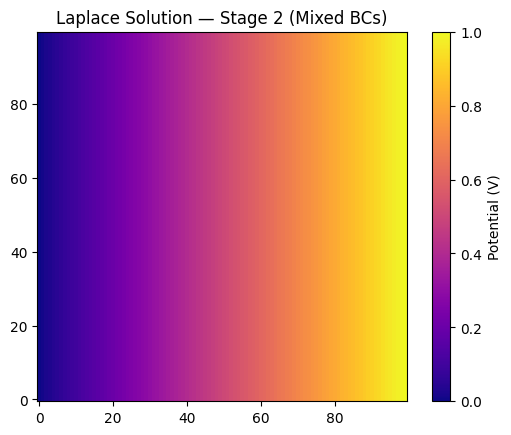

In [ ]:
# صفحه‌ای مربعی با یک ضلع دارای پتانسل و شرایط نویمن

import numpy as np
import matplotlib.pyplot as plt

nx, ny = 100, 100
V = np.zeros((nx, ny))

# Dirichlet boundaries
V[0, :] = 0    # Left = 0 V
V[-1, :] = 1   # Right = 1 V

for _ in range(20000):
    # Neumann BC (insulated)
    V[:, 0] = V[:, 1]
    V[:, -1] = V[:, -2]

    # Gauss–Seidel update
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            V[i, j] = 0.25 * (V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1])

plt.imshow(V.T, origin='lower', cmap='plasma')
plt.colorbar(label="Potential (V)")
plt.title("Laplace Solution — Stage 2 (Mixed BCs)")
plt.show()

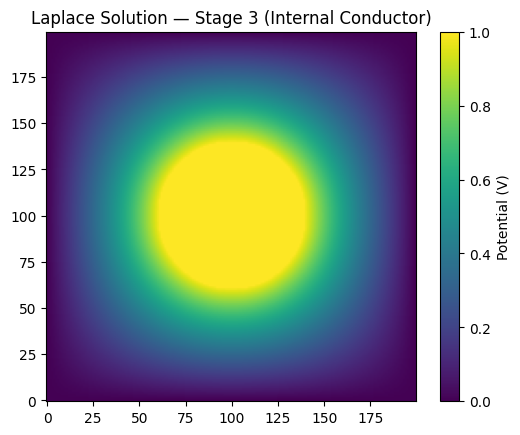

In [ ]:
# صفحه‌ای مربعی که پتانسل درون دایره‌ای در آن تعریف شده است

import numpy as np
import matplotlib.pyplot as plt

nx, ny = 200, 200
V = np.zeros((nx, ny))

# Outer box = 0V (already 0)
# Define inner circular conductor
cx, cy = nx//2, ny//2     # center
r = 40                    # radius

mask = (np.sqrt((np.arange(nx)[:,None]-cx)**2 +
                (np.arange(ny)[None,:]-cy)**2) < r)

V[mask] = 1   # Inner conductor at 1V

for _ in range(25000):
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            if mask[i, j]:      # keep conductor fixed
                continue
            V[i, j] = 0.25 * (V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1])

plt.imshow(V.T, origin='lower', cmap='viridis')
plt.colorbar(label="Potential (V)")
plt.title("Laplace Solution — Stage 3 (Internal Conductor)")
plt.show()

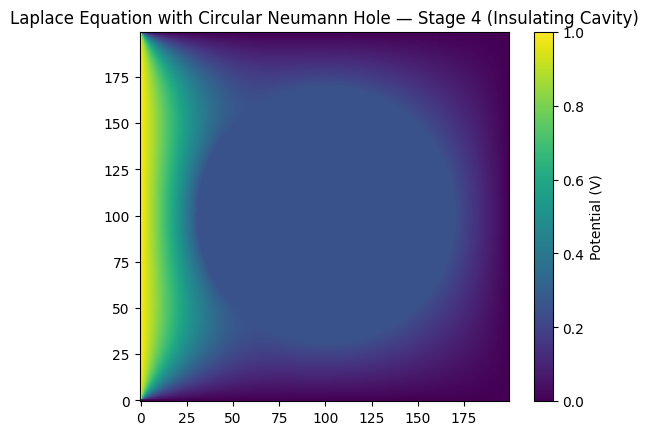

In [ ]:
# صفحه‌ای مربعی با یک ضلع دارای پتانسیل و دایره‌ای که پتانسیل در آن تعریف نمی‌شود

import numpy as np
import matplotlib.pyplot as plt

# Grid size
nx, ny = 200, 200
V = np.zeros((nx, ny))

# Outer boundary conditions
V[:, 0]  = 1.0   # bottom = 1V
V[:, -1] = 0.0   # top = 0V
V[0, :]  = 0.0   # left wall
V[-1, :] = 0.0   # right wall

# --- Circular hole (insulating cavity = Neumann BC) ---
x0, y0 = nx//2, ny//2
R = 70

Y, X = np.ogrid[:nx, :ny]
mask = (X - x0)**2 + (Y - y0)**2 <= R**2  # inside the hole

# Store previous solution for convergence
for it in range(25000):

    for i in range(1, nx-1):
        for j in range(1, ny-1):

            # Do NOT update inside the hole → Neumann BC
            if mask[i, j]:
                continue

            # Standard Laplace update outside the hole
            V[i, j] = 0.25 * (V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1])

    # --- Enforce Neumann BC ON the hole boundary ---
    # This enforces dV/dn = 0 (flat potential gradient)
    V[mask] = np.mean(V[~mask])

# --- Plot final potential ---
plt.imshow(V, origin='lower', cmap='viridis')
plt.colorbar(label="Potential (V)")
plt.title("Laplace Equation with Circular Neumann Hole — Stage 4 (Insulating Cavity)")
plt.show()

SOR 🖼️

در این نوت‌بوک، توزیع پتانسیل (یا دما) را در یک صفحه مستطیلی دوبعدی با استفاده از روش تفاضل محدودو تکنیک حل می‌کنیم.

### معادله حاکم:
معادله لاپلاس در مختصات دکارتی به صورت زیر است:
$$\nabla^2 u = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0$$

### شرایط مرزی (مثال):
ما از شرایط مرزی دیریکله (Dirichlet) استفاده می‌کنیم:
* **مرز بالا:** $V=V_0$ (مثلاً ۱۰۰ واحد)
* **مرز چپ:** $V=V_0$ (مثلاً ۱۰۰ واحد)
* **دو مرز دیگر (پایین، راست):** $V=0$

---

## توضیح روش SOR (تخفیف پیاپی افزایشی)
روش **SOR (Successive Over-Relaxation)** هسته حل عددی ما است. این روش یک تکنیک تکراری برای افزایش سرعت همگرایی در حل دستگاه معادلات خطی است که از روش گوس-سایدل مشتق می‌شود.

### فرمول اصلی:
$$\\ u_{i,j}^{\text{new}} = u_{i,j}^{\text{old}} + \omega \left( u_{i,j}^{\text{GS}} - u_{i,j}^{\text{old}} \right)$$

پارامتر تخفیف $\omega$ (که معمولاً بین ۱ تا ۲ انتخاب می‌شود)، سرعت رسیدن به همگرایی را نسبت به روش‌های ساده‌تر به شدت افزایش می‌دهد.

در کد ما، از $\omega \approx 1.8$ یا $\omega \approx 1.9$ استفاده شده که به عنوان **تخفیف افزایشی ($\mathbf{\omega > 1}$)**، سرعت همگرایی را به طور قابل توجهی بالا می‌برد.

---
در اینجا، $u_{i,j}^{\text{GS}}$ همان میانگین‌گیری از همسایگان است که ما در کد برای لاپلاس استفاده کردیم:$$u_{i,j}^{\text{GS}} = \frac{1}{4} \left( u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} \right)$$

شروع حل SOR با n=250 و omega=1.9749...
تکرار 500: حداکثر تغییر = 0.00008218

✅ همگرایی حاصل شد.
تعداد کل تکرارها: 675


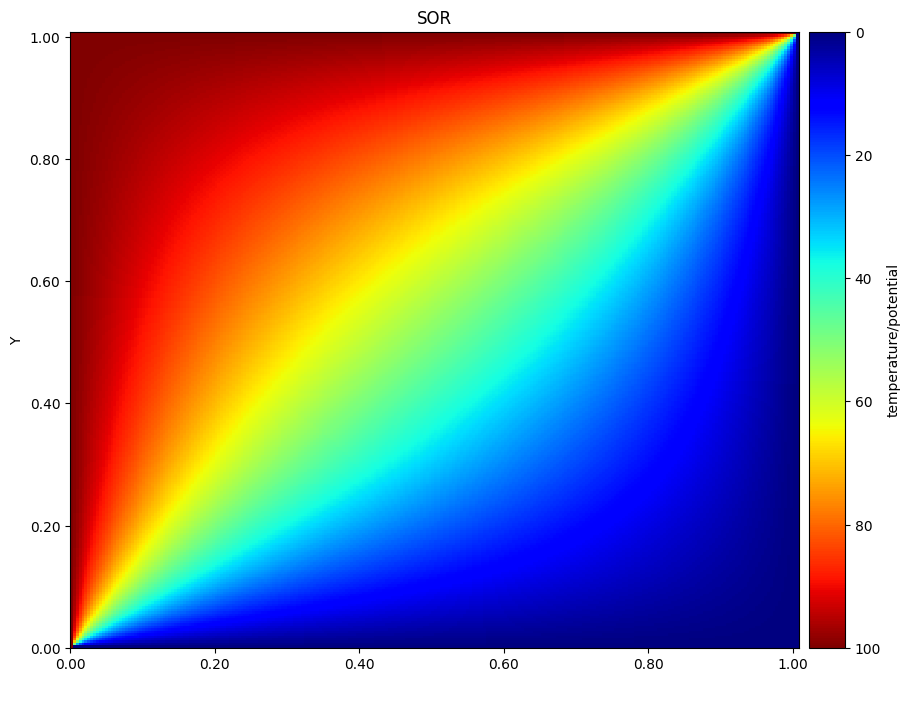

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# --- پارامترهای ثابت و بهینه (مثال) ---
n = 250             # ابعاد داخلی
N_total = n + 2     # ابعاد کل (شامل مرزها)
u1, u2, u3, u4 = 0.0, 100.0, 100.0, 0.0 # دماهای مرزی: شمال، جنوب، غرب، شرق
u5 = 50.0           # دمای اولیه داخلی (حدس)
TOLERANCE = 1e-6    # آستانه همگرایی (برای استفاده در شرط توقف)

# ضریب آرامش‌دهی بهینه (omega_opt)

omega = 2.0 - (2.0 * math.pi / n)
# تقریباً 1.9748 برای n=250

# --- 2. توابع کمکی ---

def fast_new_grid(u, n, u1, u2, u3, u4, u5):
    """
    مقداردهی اولیه u با استفاده از Slicing در NumPy.
    همچنین شرایط مرزی را تنظیم می‌کند.
    """
    N_total = n + 2
    u[1:n + 1, 1:n + 1] = u5 # مقداردهی اولیه نقاط داخلی

    # تنظیم شرایط مرزی
    u[0, :] = u1              # مرز شمالی (بالا)
    u[N_total - 1, :] = u2    # مرز جنوبی (پایین)
    u[:, 0] = u3              # مرز غربی (چپ)
    u[:, N_total - 1] = u4    # مرز شرقی (راست)
    return u

def calculate_next_sor(u_center, u_north, u_south, u_east, u_west, omega):
    """محاسبه دمای جدید با SOR."""
    aver = (u_north + u_south + u_east + u_west) / 4.0
    res = aver - u_center
    return u_center + omega * res

# --- 3. تابع اصلی آرامش‌دهی با زوجیت (relax - الگوریتم 8) ---
def relax_sor_parity(u, n, omega):

    max_change = 0.0

    for b in range(2):

        for i in range(1, n + 1):

            j_start = 1
            if (i % 2) == b:
                j_start = 2

            for j in range(j_start, n + 1, 2):

                u_center_old = u[i, j]
                u_north  = u[i - 1, j]
                u_south  = u[i + 1, j]
                u_east   = u[i, j + 1]
                u_west   = u[i, j - 1]

                # محاسبه و به‌روزرسانی درجا
                u[i, j] = calculate_next_sor(u_center_old, u_north, u_south, u_east, u_west, omega)

                # محاسبه بزرگترین تغییر برای شرط توقف
                change = abs(u[i, j] - u_center_old)
                if change > max_change:
                    max_change = change

    return max_change


# --- 4. تابع اصلی Laplace (الگوریتم 1 با شرط توقف) ---
def laplace_solver(n_internal, u_north_bc, u_south_bc, u_west_bc, u_east_bc, u_initial_guess, omega_val, tolerance):
    """
    حل کننده اصلی معادله لاپلاس با SOR و شرط توقف همگرایی.
    """
    # 1. تعریف و مقداردهی اولیه شبکه u
    N_total = n_internal + 2
    u = np.zeros((N_total, N_total), dtype=np.float64)
    u = fast_new_grid(u, n_internal, u_north_bc, u_south_bc, u_west_bc, u_east_bc, u_initial_guess)

    iteration = 0
    max_change = tolerance + 1.0 # اطمینان از اجرای حداقل یک تکرار

    print(f"شروع حل SOR با n={n_internal} و omega={omega_val:.4f}...")

    # 2. حلقه تکرار (جایگزینی تعداد گام ثابت با شرط توقف)
    while max_change > tolerance:

        # اجرای یک گام آرامش‌دهی و دریافت بزرگترین تغییر
        max_change = relax_sor_parity(u, n_internal, omega_val)

        iteration += 1

        # نمایش پیشرفت
        if iteration % 500 == 0:
            print(f"تکرار {iteration}: حداکثر تغییر = {max_change:.8f}")

    print(f"\n✅ همگرایی حاصل شد.")
    print(f"تعداد کل تکرارها: {iteration}")

    return u

# --- 5. فراخوانی تابع ---
u_final = laplace_solver(n, u1, u2, u3, u4, u5, omega, TOLERANCE)



# --- 6. ترسیم نتایج ---
plt.figure(figsize=(10, 8))

im = plt.pcolormesh(u_final[:, :], cmap='jet', shading='auto')
plt.xticks(np.arange(0, N_total, N_total // 5), [f'{x/(N_total-1):.2f}' for x in np.arange(0, N_total, N_total // 5)])
plt.yticks(np.arange(0, N_total, N_total // 5), [f'{y/(N_total-1):.2f}' for y in np.arange(0, N_total, N_total // 5)])

plt.xlabel(" ")
plt.ylabel("Y")
plt.title("SOR")

# اضافه کردن نوار رنگ
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label("temperature/potential")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import numpy as np
import math
import plotly.graph_objects as go
from plotly.offline import iplot # برای نمایش بهتر در Colab

# --- پارامترهای ثابت و بهینه ---
N_PLOT = 50             # ابعاد داخلی (برای سرعت حل و ترسیم 3D)
N_total = N_PLOT + 2
u1, u2, u3, u4 = 0.0, 100.0, 100.0, 0.0 # BCs: شمال(0), جنوب(100), غرب(100), شرق(0)
u5 = 50.0
TOLERANCE = 1e-6
omega_plot = 2.0 - (2.0 * math.pi / N_PLOT)

# --- توابع حل (بدون تغییر) ---
def fast_new_grid(u, n, u1, u2, u3, u4, u5):
    N_total = n + 2
    u[1:n + 1, 1:n + 1] = u5
    u[0, :] = u1              # مرز شمالی (بالا)
    u[N_total - 1, :] = u2    # مرز جنوبی (پایین)
    u[:, 0] = u3              # مرز غربی (چپ)
    u[:, N_total - 1] = u4    # مرز شرقی (راست)
    return u

def calculate_next_sor(u_center, u_north, u_south, u_east, u_west, omega):
    aver = (u_north + u_south + u_east + u_west) / 4.0
    res = aver - u_center
    return u_center + omega * res

def relax_sor_parity(u, n, omega):
    max_change = 0.0
    for b in range(2):
        for i in range(1, n + 1):
            j_start = 1
            if (i % 2) == b:
                j_start = 2
            for j in range(j_start, n + 1, 2):
                u_center_old = u[i, j]
                u_north  = u[i - 1, j]
                u_south  = u[i + 1, j]
                u_east   = u[i, j + 1]
                u_west   = u[i, j - 1]
                u[i, j] = calculate_next_sor(u_center_old, u_north, u_south, u_east, u_west, omega)

                change = abs(u[i, j] - u_center_old)
                if change > max_change:
                    max_change = change
    return max_change

def laplace_solver(n_internal, u_north_bc, u_south_bc, u_west_bc, u_east_bc, u_initial_guess, omega_val, tolerance):
    N_total = n_internal + 2
    u = np.zeros((N_total, N_total), dtype=np.float64)
    u = fast_new_grid(u, n_internal, u_north_bc, u_south_bc, u_west_bc, u_east_bc, u_initial_guess)

    iteration = 0
    max_change = tolerance + 1.0

    print(f"شروع حل SOR با n={n_internal} و omega={omega_val:.4f}...")

    # محدودیت تعداد تکرارها برای جلوگیری از طولانی شدن بیش از حد در Colab
    while max_change > tolerance and iteration < 5000:
        max_change = relax_sor_parity(u, n_internal, omega_val)
        iteration += 1
        if iteration % 1000 == 0:
             print(f"تکرار {iteration}: حداکثر تغییر = {max_change:.8f}")

    print(f"\n همگرایی حاصل شد در تکرار: {iteration}")
    return u

# --- فراخوانی تابع ---
u_final = laplace_solver(N_PLOT, u1, u2, u3, u4, u5, omega_plot, TOLERANCE)


# --- ۲. ترسیم تعاملی سه‌بعدی با Plotly ---
# ایجاد محورهای x و y برای نمایش مختصات مکانی
X = np.linspace(0, 1, N_PLOT)
Y = np.linspace(0, 1, N_PLOT)
# ماتریس Z (دما/پتانسیل) فقط نقاط داخلی را شامل می‌شود
Z = u_final[1:N_PLOT+1, 1:N_PLOT+1]

# تعریف سطح سه‌بعدی
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])

# تنظیمات و عنوان
fig.update_layout(
    title='توزیغ دما / پتانسیل در یک نمایش ۳ بعدی',
    autosize=False,
    scene = dict(
        xaxis_title='موقعیت X (غرب تا شرق)',
        yaxis_title='موقعیت Y (جنوب تا شمال)',
        zaxis_title='پتانسیل / دما (u)',
        aspectmode='cube', # برای حفظ تناسب اضلاع
        # تنظیم زاویه اولیه برای دید بهتر
        camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=1.5, y=1.5, z=1.0)
        )
    ),
    width=800, height=800
)

# نمایش نمودار تعاملی در Colab
fig.show()

شروع حل SOR با n=50 و omega=1.8743...

 همگرایی حاصل شد در تکرار: 135


# پروژه نهایی: حل عددی معادله لاپلاس در هندسه نیم‌کره 📐

این نوت‌بوک توزیع پتانسیل را برای یک دامنه نیم‌کره‌ای با استفاده از **روش تفاضل محدود (FDM)** حل کرده و نتایج آن را با حل تحلیلی ساده مقایسه می‌کند.

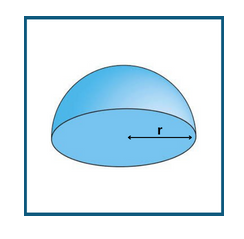







معادله حاکم (در مختصات استوانه‌ای):
$$\nabla^2 u = \frac{\partial^2 u}{\partial \rho^2} + \frac{1}{\rho}\frac{\partial u}{\partial \rho} + \frac{\partial^2 u}{\partial z^2} = 0$$


از طرفی ما پتانسیلی رو بررسی میکنیم که نسبت به زاویه چرخش حول محور (زد) تقارن دارد
$$\Phi(r, \theta, \phi) = \Phi(r, \theta) = \Phi(\rho, z)$$
حال ما میتوانیم پتانسیل رو در یک صفحه ای که در ان محور های ما عبارت است از:

ρ and z

نمایش دهیم و از انجایی که ما در واقع در دو بعد مساله را حل میکنیم فرقی ندارد که از مختصات کروی استفاده کنیم یا استوانه ای اما استفاده از مختصات کروی راحتی خود را دارد و ما این مختصات را استفاده خواهیم کرد حال متوجه نوشتن معادله لاپلاس در مختصات کروی در بالا میشوید که با همین فرض تقارن نوشته شده است

:)
### شرایط مرزی:
* **مرز کف ($z=0$):** $V=0$
* **مرز پوسته ($r=R$):** $V = V_0 \times (z/R)$ or V_0 × cosΘ

---

## SOR (تخفیف پیاپی افزایشی)

۱. معادله لاپلاس در مختصات استوانه‌ای (با تقارن سمتی)  cylindricalبه دلیل سادگی نسبی در گسسته‌سازی، معمولاً حل مسئله‌ای که به $\phi$ (زاویه سمتی) وابسته نیست، در مختصات استوانه‌ای $(\rho, z)$ انجام می‌شود.معادله لاپلاس در مختصات استوانه‌ای، با فرض تقارن سمتی ($\frac{\partial u}{\partial \phi}=0$ و $\frac{\partial^2 u}{\partial \phi^2}=0$):

$$\nabla^2 u = \frac{1}{\rho} \frac{\partial}{\partial \rho} \left( \rho \frac{\partial u}{\partial \rho} \right) + \frac{\partial^2 u}{\partial z^2} =
0$$

الف) گسسته‌سازی (تفاضل محدود)برای یک نقطه داخلی $(\rho_i, z_j)$ روی شبکه‌بندی $\Delta \rho = \Delta z = h$:  

$$\frac{u_{i+1, j} - 2u_{i, j} + u_{i-1, j}}{h^2} + \frac{1}{\rho_i} \frac{u_{i+1, j} - u_{i-1, j}}{2h} + \frac{u_{i, j+1} - 2u_{i, j} + u_{i, j-1}}{h^2} = 0$$با ساده‌سازی، ضریب $u_{i, j}$ را پیدا می‌کنیم و مقدار $u_{i, j}$ در تکرار جدید  را به دست می‌آوریم:

$$u_{i, j} = \frac{1}{4} \left[ \left( 1 + \frac{h}{2\rho_i} \right) u_{i+1, j} + \left( 1 - \frac{h}{2\rho_i} \right) u_{i-1, j} + u_{i, j+1} + u_{i, j-1} \right]$$

ب) شرط :

ρ = 0 > 1/ρ

میبینیم که این جمله نا معین خواهد شد پس:


$$\lim_{\rho \to 0} \frac{1}{\rho} \frac{\partial}{\partial \rho} \left( \rho \frac{\partial u}{\partial \rho} \right) = 2 \frac{\partial^2 u}{\partial \rho^2}$$بنابراین، برای نقاط روی محور $\rho=0$:$$u_{0, j} = \frac{1}{6} \left[ 4 u_{1, j} + u_{0, j+1} + u_{0, j-1} \right]$$

(این فرض بر اساس تقریب مرتبه دوم برای مشتقات و عدم وجود وابستگی به $\phi$ است).

---
### پس ما برای حل و تغییر مقدار هر خانه دو رابطه داریم که با توجه به موقعیت خانه از رابطه مربوطه استفاده خواهیم کرد در واقع میتوان به این موضوع شک کرد که این کار باعث به وجود امدن خطا خواهد شد که بعدا به ان میرسیم

... شروع حل عددی ...

همگرایی حاصل شد در تکرار: 517
... حل کامل شد ...


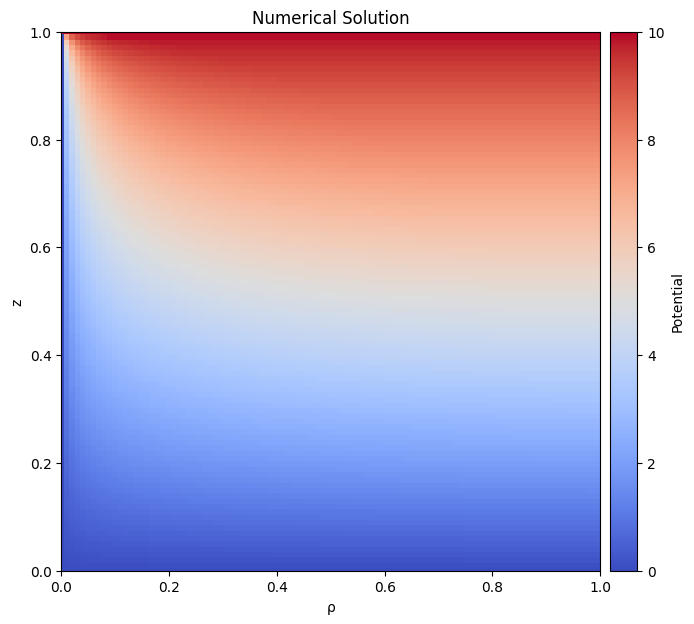

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# --- A. پارامترهای هندسی و شبکه ---
R = 1.0
N = 100
N_total = N + 2
h = R / (N + 1)
U_initial = 0.0
TOLERANCE = 1e-6
omega = 1.9  # ضریب تخفیف برای SOR
MAX_ITERATIONS = 20000

rho_coords = np.linspace(0.0, R, N_total)
z_coords = np.linspace(R, 0.0, N_total)

# --- B. توابع حل (اصلاح شده) ---

def calculate_next_cylindrical(u_center, u_north, u_south, u_east, u_west, rho_i, h, omega):
    """یک گام SOR برای یک نقطه در مختصات استوانه‌ای."""
    if rho_i == 0.0:
        aver = (4.0 * u_east + u_north + u_south) / 6.0
    else:
        weight_east = 1.0 + h / (2.0 * rho_i)
        weight_west = 1.0 - h / (2.0 * rho_i)
        aver = (weight_east * u_east + weight_west * u_west + u_north + u_south) / 4.0

    res = aver - u_center
    return u_center + omega * res

def setup_cylindrical_grid(n, R, h, rho_coords, z_coords, u_initial):
    """ایجاد شبکه و ماسک‌گذاری نقاط ثابت."""
    N_total = n + 2
    U = np.zeros((N_total, N_total), dtype=np.float64)
    U[:, :] = u_initial

    # آرایه ماسک: True یعنی نقطه مرزی است و نباید تغییر کند
    Mask = np.zeros((N_total, N_total), dtype=bool)

    FIXED_BC_VALUE = 10.0

    for j in range(N_total):
        for i in range(N_total):
            rho = rho_coords[i]
            z = z_coords[j]
            r = math.sqrt(rho**2 + z**2)

            # --- اصلاح ۱: تعریف bb در ابتدای حلقه ---
            # جلوگیری از ارور UnboundLocalError
            if R != 0:
                bb = z / R
            else:
                bb = 0

            # 1. شرط مرزی کف
            if j == N_total - 1:
                U[j, i] = 0.0
                Mask[j, i] = True

            # 2. شرط مرزی سقف
            elif j == 0:
                U[j, i] = FIXED_BC_VALUE * (bb)
                Mask[j, i] = True

            # 3. شرط مرزی دیواره راست
            elif i == N_total - 1:
                 U[j, i] = FIXED_BC_VALUE * (bb)
                 Mask[j, i] = True

            # 4. شرط مرزی سطح منحنی (نیم‌کره)
            # این نقاط باید قفل شوند تا در حل عددی تغییر نکنند
            if abs(r - R) < (h / 1.5):
                U[j, i] = FIXED_BC_VALUE * (bb)
                Mask[j, i] = True # --- اصلاح ۲: قفل کردن مرز منحنی ---

    return U, Mask

def relax_sor_parity(U, Mask, N, h, rho_coords, omega):
    """حل SOR با در نظر گرفتن ماسک."""
    max_change = 0.0
    for b in range(2):
        for j in range(1, N + 1):
            start_i = 1 + (j + b) % 2
            for i in range(start_i, N + 1, 2):

                # --- اصلاح ۳: احترام به ماسک ---
                # اگر نقطه ثابت است، از آن رد شو
                if Mask[j, i]:
                    continue

                rho_i = rho_coords[i]
                u_center_old = U[j, i]

                u_north  = U[j - 1, i]
                u_south  = U[j + 1, i]
                u_east   = U[j, i + 1]
                u_west   = U[j, i - 1]

                U[j, i] = calculate_next_cylindrical(u_center_old, u_north, u_south, u_east, u_west, rho_i, h, omega)

                change = abs(U[j, i] - u_center_old)
                if change > max_change:
                    max_change = change
    return max_change

def laplace_cylindrical_solver(N, R, h, rho_coords, z_coords, u_initial, omega, tolerance, max_iter):
    """حل کننده اصلی."""

    # --- اصلاح ۴: دریافت Mask از تابع ستاپ ---
    U_final, Mask = setup_cylindrical_grid(N, R, h, rho_coords, z_coords, u_initial)

    iteration = 0
    max_change = tolerance + 1.0

    while max_change > tolerance and iteration < max_iter:
        # ارسال Mask به تابع حل‌گر
        max_change = relax_sor_parity(U_final, Mask, N, h, rho_coords, omega)
        iteration += 1

    if max_change <= tolerance:
        print(f"\nهمگرایی حاصل شد در تکرار: {iteration}")
    else:
        print(f"\n هشدار: همگرایی حاصل نشد.")

    return U_final

# =========================================================
# --- C. اجرا و ترسیم ---

print("... شروع حل عددی ...")
U_solution = laplace_cylindrical_solver(N, R, h, rho_coords, z_coords, U_initial, omega, TOLERANCE, MAX_ITERATIONS)
print("... حل کامل شد ...")

X, Y = np.meshgrid(rho_coords, z_coords)

fig, ax1 = plt.subplots(figsize=(8, 7))
im1 = ax1.pcolormesh(X, Y, U_solution, cmap='coolwarm', shading='auto') # vmin/vmax حذف شد تا کانتراست بهتر شود
ax1.set_title("Numerical Solution")
ax1.set_xlabel("ρ")
ax1.set_ylabel("z")
ax1.set_aspect('equal', adjustable='box')

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im1, cax=cax, label="Potential")

ax1.set_xlim(0, R)
ax1.set_ylim(0, R)

plt.show()

#### نکته ای که در این حل وجود دارد این است که ما در واقع میخواستیم پتانسیل در داخل کره رو بدست بیاوریم اما ما در صفحه نقاطی داریم که بیرون کره قرار دارند
#### در واقع برای الگوریتم شرایط فیزیکی ما مهم نیست این الگوریتم برای هر نقطه در صفحه پتانسیل را با در نظر گرفتن شرایط مرزی بدست میاورد در واقع شرایط فیزیک ما نا دیده گرفته شده است ناجیه ای که ما میخواستیم بررسی کنیم درون کره بوده
بیایید این رو هم حل کنیم

... شروع محاسبات ...

همگرایی حاصل شد در تکرار: 1993
... پایان ...


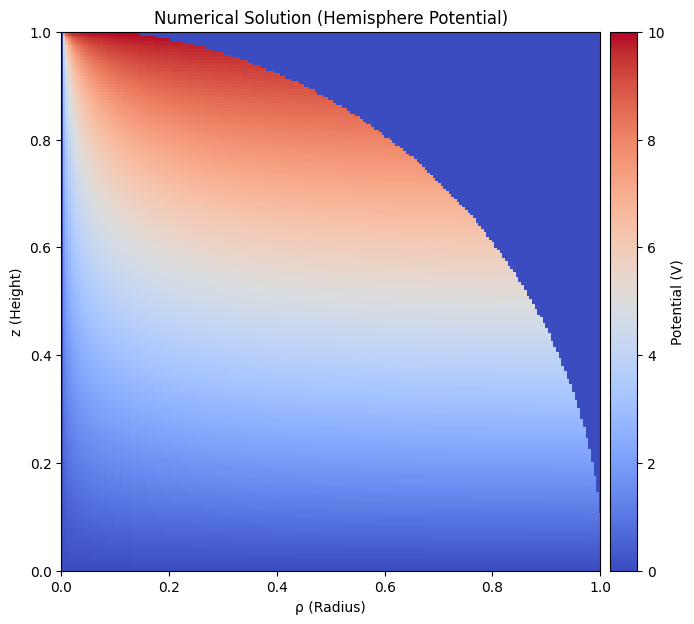

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# --- A. پارامترهای مسئله ---
R = 1.0
N = 200          # تعداد نقاط شبکه
N_total = N + 2
h = R / (N + 1)    # گام شبکه
U_initial = 0.0
TOLERANCE = 1e-6
omega = 1.9        # ضریب تخفیف SOR
MAX_ITERATIONS = 20000

rho_coords = np.linspace(0.0, R, N_total)
z_coords = np.linspace(R, 0.0, N_total)

# --- B. توابع حل عددی ---

def calculate_next_cylindrical(u_center, u_north, u_south, u_east, u_west, rho_i, h, omega):
    """محاسبه مقدار جدید یک نقطه با فرمول لاپلاس در مختصات استوانه‌ای"""
    if rho_i == 0.0:
        # روی محور تقارن (rho=0)
        aver = (4.0 * u_east + u_north + u_south) / 6.0
    else:
        # نقاط داخلی استاندارد
        weight_east = 1.0 + h / (2.0 * rho_i)
        weight_west = 1.0 - h / (2.0 * rho_i)
        aver = (weight_east * u_east + weight_west * u_west + u_north + u_south) / 4.0

    res = aver - u_center
    return u_center + omega * res

def setup_cylindrical_grid(n, R, h, rho_coords, z_coords, u_initial):
    """
    ایجاد شبکه و اعمال شرایط مرزی.
    نقاط بیرون کره مقدار اولیه می‌مانند و قفل می‌شوند.
    """
    N_total = n + 2
    U = np.zeros((N_total, N_total), dtype=np.float64)
    U[:, :] = u_initial

    # آرایه ماسک: True یعنی نقطه قفل است و نباید تغییر کند
    Mask = np.zeros((N_total, N_total), dtype=bool)

    FIXED_BC_VALUE = 10.0

    for j in range(N_total):
        for i in range(N_total):
            rho = rho_coords[i]
            z = z_coords[j]
            r = math.sqrt(rho**2 + z**2)

            # محاسبه مقدار مرزی (z/R)
            if R != 0:
                bb = z / R
            else:
                bb = 0

            # 1. شرط مرزی کف (z=0) -> صفر
            if j == N_total - 1:
                U[j, i] = 0.0
                Mask[j, i] = True

            # 2. ناحیه بیرونی و مرز (r >= R)
            elif r >= R:
                Mask[j, i] = True

                if (r - R) < (h * 1.2):
                    U[j, i] = FIXED_BC_VALUE * bb
                else:
                    U[j, i] = u_initial # بیرون کره صفر بماند

    return U, Mask

def relax_sor_parity(U, Mask, N, h, rho_coords, omega):
    """حلقه حل SOR با در نظر گرفتن ماسک"""
    max_change = 0.0
    for b in range(2): # الگوی شطرنجی (Red-Black)
        for j in range(1, N + 1):
            start_i = 1 + (j + b) % 2
            for i in range(start_i, N + 1, 2):

                # اگر نقطه ماسک شده (بیرون یا مرز)، رد شو
                if Mask[j, i]:
                    continue

                rho_i = rho_coords[i]
                u_center_old = U[j, i]

                u_north  = U[j - 1, i]
                u_south  = U[j + 1, i]
                u_east   = U[j, i + 1]
                u_west   = U[j, i - 1]

                U[j, i] = calculate_next_cylindrical(u_center_old, u_north, u_south, u_east, u_west, rho_i, h, omega)

                change = abs(U[j, i] - u_center_old)
                if change > max_change:
                    max_change = change
    return max_change

def laplace_cylindrical_solver(N, R, h, rho_coords, z_coords, u_initial, omega, tolerance, max_iter):
    # دریافت شبکه و ماسک
    U_final, Mask = setup_cylindrical_grid(N, R, h, rho_coords, z_coords, u_initial)

    iteration = 0
    max_change = tolerance + 1.0

    while max_change > tolerance and iteration < max_iter:
        max_change = relax_sor_parity(U_final, Mask, N, h, rho_coords, omega)
        iteration += 1

    if max_change <= tolerance:
        print(f"\nهمگرایی حاصل شد در تکرار: {iteration}")
    else:
        print(f"\n هشدار: همگرایی حاصل نشد (تعداد تکرار ناکافی).")

    return U_final

# =========================================================
# --- C. اجرا و نمایش ---

print("... شروع محاسبات ...")
U_solution = laplace_cylindrical_solver(N, R, h, rho_coords, z_coords, U_initial, omega, TOLERANCE, MAX_ITERATIONS)
print("... پایان ...")

# تنظیمات گرافیکی
X, Y = np.meshgrid(rho_coords, z_coords)
fig, ax1 = plt.subplots(figsize=(8, 7))

# رسم نقشه رنگی
im1 = ax1.pcolormesh(X, Y, U_solution, cmap='coolwarm', shading='auto')

ax1.set_title("Numerical Solution (Hemisphere Potential)")
ax1.set_xlabel("ρ (Radius)")
ax1.set_ylabel("z (Height)")
ax1.set_aspect('equal', adjustable='box')

# نوار رنگ
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im1, cax=cax, label="Potential (V)")

# محدوده‌ها
ax1.set_xlim(0, R)
ax1.set_ylim(0, R)

plt.show()

### خب در این الگوریتیم دیگر نقاط بیرون کره و بی ارزش ما حل نشده اند . در این الگوریتم ما تاکید کردیم که اگر بیرون از کره بودیم مقدار پتانسیل رو همان مقدار اولیه قرار بدیم در واقع میشد تنها نقاط بیرون کره را رسم نکرد و الگوریتم رو بهینه کرد اما در کل هدف این بود که قسمت بیرون کره در حل ما قرار نگیرد

---
### حالا بیایید ببینیم حل ما چقدر دقیق است
به عمل تابع پتانسیل چنین تابع ساده است که بتوان با حل تحلیلی نیز بررسی کرد و مقایسه کرد

حل عمومی معادله لاپلاس برای یک دامنه کروی متقارن حول محور $z$ به صورت زیر است:$$\Phi(r, \theta) = \sum_{n=0}^{\infty} A_n \left(\frac{r}{R}\right)^n P_n(\cos\theta)$$


برای ارضای این شرط مرزی ، ما تنها به ترم $P_1$ نیاز داریم.

شرط BC: $\Phi(R) = V_0 \cdot \frac{z}{R}$

تبدیل: در مختصات کروی، $\frac{z}{R}$ در مرز $r=R$ معادل $\mathbf{\cos\theta}$ است.


تابع لژاندر: از آنجایی که $\mathbf{P_1(\cos\theta) = \cos\theta}$ است

$$\Phi(R) = V_0 \cdot P_1(\cos\theta)$$

حل تحلیلی که در این کد ارائه شده، نمایانگر ساده‌ترین حالت حل معادله لاپلاس ($\nabla^2\Phi=0$) در مختصات کروی است که با شرایط مرزی خاصی مطابقت دارد.


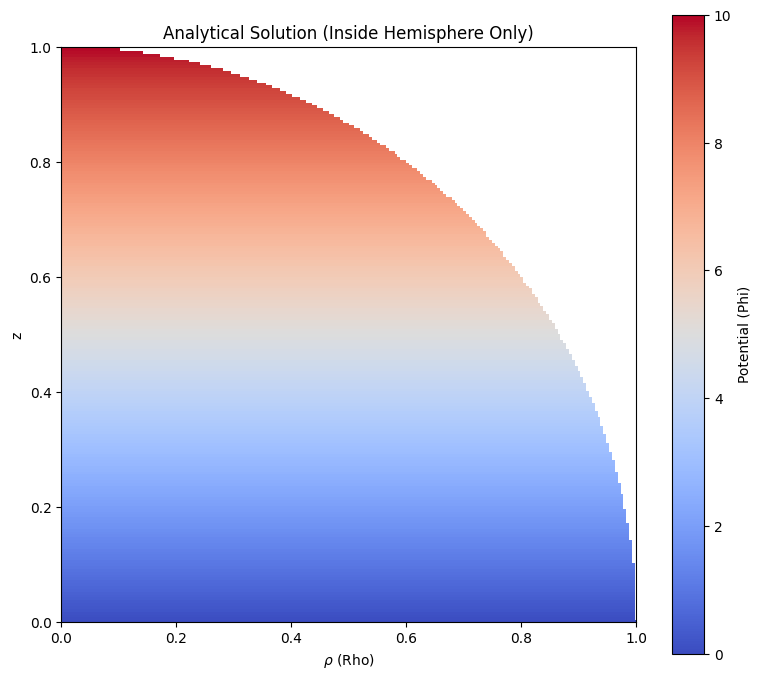

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# --- 1. پارامترهای هندسی و شبکه ---
R = 1.0
N = 200
N_total = N + 2
V0 = 10.0

# ایجاد مختصات شبکه
rho_coords = np.linspace(0.0, R, N_total)
z_coords = np.linspace(R, 0.0, N_total)

# --- 2. تابع جواب تحلیلی ---
def calculate_analytical_P1(r, z, R, V0):
    if z < 1e-9:
        return 0.0
    return V0 * (z / R)

# --- 3. ساخت ماتریس جواب تحلیلی ---
Phi_exact = np.zeros((N_total, N_total), dtype=np.float64)

for i in range(N_total):    # حلقه روی rho (ستون‌ها)
    for j in range(N_total):    # حلقه روی z (ردیف‌ها)
        rho = rho_coords[i]
        z = z_coords[j]
        r = math.sqrt(rho**2 + z**2)

        # شرط مهم: اگر بیرون نیم‌کره است، مقدار را نامعتبر (NaN) کن
        if r > R:
            Phi_exact[j, i] = np.nan
        else:
            # فقط داخل نیم‌کره محاسبه شود
            Phi_exact[j, i] = calculate_analytical_P1(r, z, R, V0)

# --- 4. ترسیم نقشه حرارتی ---
X, Y = np.meshgrid(rho_coords, z_coords) # اصلاح برای رسم دقیق‌تر با pcolormesh

fig, ax = plt.subplots(figsize=(8, 7))

# رسم با مدیریت NaN (نقاط بیرون سفید می‌شوند)
im = ax.pcolormesh(X, Y, Phi_exact, cmap='coolwarm', shading='auto', vmin=0.0, vmax=V0)

ax.set_title("Analytical Solution (Inside Hemisphere Only)")
ax.set_xlabel("$\\rho$ (Rho)")
ax.set_ylabel("z")
ax.set_aspect('equal', adjustable='box')

plt.colorbar(im, ax=ax, label="Potential (Phi)")

ax.set_xlim(0, R)
ax.set_ylim(0, R)

plt.tight_layout()
plt.show()

### میتوان دید در همان نواحی
$$ρ = 0$$
### ما حطایی رو داریم و انگار که مقادیر در ان ناحیه خیلی شبیه و نزدیک به مقادیر اولیه ما هستند . پس این میتوانم یک شهود خوب باشد که مقادیر اولیه ای که ما در باید در این الگوریتم استفاده کنیم میتواند تاثیر بالایی در نتیجه ما داشته باشد
:)

### در آخر بیایید این حل های عددی و تحلیلی رو کنار هم بگذاریم و مقادیر دور از مقادیر درست رو بهتر ببینیم
برای این کار ما در صحفه خود مقادیری قرار میدهیم که برابر با اختلاف مقادیر پتانسیل در نقاط متناظر در دو صفحه بالا است.
$$\text{Error} = | U_{\text{Numerical}} - U_{\text{Analytical}} |$$
این همان مقدار در هر نقطه از صفحه است.

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# --- 1. پارامترها ---
R = 1.0
N = 250
N_total = N + 2
h = R / (N + 1)
U_initial = 0.0
TOLERANCE = 1e-5
omega = 1.8
MAX_ITERATIONS = 5000
V0 = 10.0

rho_coords = np.linspace(0.0, R, N_total)
z_coords = np.linspace(R, 0.0, N_total)

# ==========================================
# بخش اول: حل عددی (Numerical Solution)
# ==========================================

def calculate_next_cylindrical(u_center, u_north, u_south, u_east, u_west, rho_i, h, omega):
    if rho_i == 0.0:
        aver = (4.0 * u_east + u_north + u_south) / 6.0
    else:
        weight_east = 1.0 + h / (2.0 * rho_i)
        weight_west = 1.0 - h / (2.0 * rho_i)
        aver = (weight_east * u_east + weight_west * u_west + u_north + u_south) / 4.0
    return u_center + omega * (aver - u_center)

# آماده‌سازی شبکه عددی
U_num = np.zeros((N_total, N_total))
Mask = np.zeros((N_total, N_total), dtype=bool)

for j in range(N_total):
    for i in range(N_total):
        r = math.sqrt(rho_coords[i]**2 + z_coords[j]**2)
        bb = z_coords[j] / R

        # شرط مرزی کف
        if j == N_total - 1:
            U_num[j, i] = 0.0
            Mask[j, i] = True
        # شرط مرزی ناحیه بیرونی و پوسته
        elif r >= R:
            Mask[j, i] = True
            if (r - R) < (h * 1.2): # لایه مرزی
                U_num[j, i] = V0 * bb
            else:
                U_num[j, i] = 0.0 # بیرون

# حلقه حل عددی
for _ in range(MAX_ITERATIONS):
    max_change = 0.0
    for b in range(2):
        for j in range(1, N + 1):
            start_i = 1 + (j + b) % 2
            for i in range(start_i, N + 1, 2):
                if Mask[j, i]: continue
                u_old = U_num[j, i]
                u_new = calculate_next_cylindrical(u_old, U_num[j-1,i], U_num[j+1,i],
                                                   U_num[j,i+1], U_num[j,i-1], rho_coords[i], h, omega)
                U_num[j, i] = u_new
                change = abs(u_new - u_old)
                if change > max_change: max_change = change
    if max_change < TOLERANCE: break

# ==========================================
# بخش دوم: حل تحلیلی (Analytical Solution)
# ==========================================
U_exact = np.zeros((N_total, N_total))
for j in range(N_total):
    for i in range(N_total):
        r = math.sqrt(rho_coords[i]**2 + z_coords[j]**2)
        if r <= R:
            U_exact[j, i] = V0 * (z_coords[j] / R)
        else:
            U_exact[j, i] = np.nan # بیرون را NaN می‌گذاریم

# ==========================================
# بخش سوم: محاسبه اختلاف و ترسیم
# ==========================================

# محاسبه ماتریس خطا (قدرمطلق اختلاف)
# از تابع np.abs استفاده می‌کنیم
Error_Map = np.abs(U_num - U_exact)

# ماسک کردن ناحیه بیرون برای ماتریس خطا (برای تمیزی نمودار)
for j in range(N_total):
    for i in range(N_total):
        if math.sqrt(rho_coords[i]**2 + z_coords[j]**2) > R:
            Error_Map[j, i] = np.nan

# ترسیم
X, Y = np.meshgrid(rho_coords, z_coords)
fig, ax = plt.subplots(figsize=(9, 7))


im = ax.pcolormesh(X, Y, Error_Map, cmap='inferno', shading='auto')

ax.set_title(f"Absolute Error Distribution |N={N}|")
ax.set_xlabel("rho")
ax.set_ylabel("z")
ax.set_aspect('equal')

# نوار رنگ با فرمت علمی (چون خطاها معمولاً کوچک هستند)
plt.colorbar(im, label="Absolute Error |U_num - U_exact|", format='')

ax.set_xlim(0, R)
ax.set_ylim(0, R)

plt.show()

تحلیل خطای فرکانس بالا و پایین و نقش آن‌ها در روش چندشبکه‌ای (Multigrid)

در حل عددی معادلات بیضوی مانند معادلهٔ لاپلاس، معمولاً از روش‌های تکراری مانند Jacobi، Gauss–Seidel یا SOR استفاده می‌شود. رفتار این الگوریتم‌ها زمانی به‌درستی درک می‌شود که خطای حل را نه‌تنها به‌صورت یک عدد، بلکه به‌صورت یک تابع موجی بررسی کنیم. در واقع، خطا را می‌توان برحسب مؤلفه‌های با فرکانس مختلف تحلیل کرد. این تحلیل، پایهٔ شهودی و ریاضی روش چندشبکه‌ای (Multigrid) را تشکیل می‌دهد.

۱. تعریف خطا و تجزیهٔ طیفی آن
اگر u جواب دقیق باشد و v جواب عددی:
e=u-v
این خطا یک میدان اسکالر روی دامنه است و می‌توان آن را مانند هر تابع دیگری، با تجزیهٔ فوریه (Fourier decomposition) به مجموعه‌ای از موج‌ها تقسیم کرد:
این تقسیم‌بندی مبنای تعریف خطای «فرکانس بالا» و «فرکانس پایین» است.

۲. تعریف خطای فرکانس بالا و فرکانس پایین
۲.۱ خطای فرکانس بالا (High-Frequency Error)

به مؤلفه‌هایی از خطا گفته می‌شود که روی شبکهٔ گسسته‌شده، تغییرات سریع دارند.
به بیان دیگر:

مقدار خطا از یک نقطهٔ شبکه به نقطهٔ مجاور به‌شدت نوسان می‌کند.

طول‌موج این خطا در حد چند برابر فاصلهٔ مش (dx , dy) است.

ساختاری شبیه الگوی شطرنجی دارد.

این مؤلفه‌ها به‌سرعت توسط روش‌های Jacobi، Gauss–Seidel و SOR حذف می‌شوند.

۲.۲ خطای فرکانس پایین (Low-Frequency Error)

به مؤلفه‌هایی از خطا گفته می‌شود که تغییرات آرام و گسترده در دامنه دارند:

مقدار خطا در یک ناحیه بزرگ تقریباً یکنواخت است.

طول‌موج بزرگ‌تر از مقیاس شبکه است.

مانند یک سطح صاف و منحنی با شیب کوچک رفتار می‌کند.

این مؤلفه‌ها به‌سختی توسط روش‌های معمول تکراری حذف می‌شوند و سرعت همگرایی را محدود می‌کنند.

ایدهٔ کلیدی روش چندشبکه‌ای (Multigrid)

روش چندشبکه‌ای دقیقاً بر پایهٔ رفتار طیفی فوق ساخته شده است.
هدف آن حذف همهٔ مؤلفه‌های خطا—چه پرنوسان و چه کم‌نوسان—در یک سازوکار ترکیبی است.

مرحلهٔ اول: Smoothing روی شبکهٔ ریز (fine grid)

چند گام Gauss–Seidel یا SOR اجرا می‌شود.

مرحلهٔ دوم: انتقال به شبکهٔ درشت (Restriction)

ایدهٔ کلیدی:

یک موج کم‌فرکانس روی شبکهٔ ریز، روی شبکهٔ درشت تبدیل به یک موج پرنوسان می‌شود.

مرحلهٔ سوم: حل یا Smoothing روی شبکهٔ درشت

اکنون که خطای coarse-grid شبیه موج پرفرکانس شده، دوباره smoother به‌خوبی می‌تواند آن را نابود کند.

در عمیق‌ترین سطح، معمولاً سیستم کوچک به‌صورت مستقیم حل می‌شود.

مرحلهٔ چهارم: بازگشت به شبکهٔ ریز (Prolongation)

تصحیح محاسبه‌شده روی شبکهٔ درشت به شبکهٔ ریز interpolate می‌شود و روی تقریب قبلی اعمال می‌گردد.

MG cycle 0, residual 4.096e+03
MG cycle 1, residual 3.256e+02
MG cycle 2, residual 1.621e+02
MG cycle 3, residual 1.084e+02
MG cycle 4, residual 8.108e+01
MG cycle 5, residual 6.465e+01
MG cycle 6, residual 5.361e+01
MG cycle 7, residual 4.585e+01
MG cycle 8, residual 4.002e+01
MG cycle 9, residual 3.541e+01
MG cycle 10, residual 3.176e+01
MG cycle 11, residual 2.879e+01
MG cycle 12, residual 2.626e+01
MG cycle 13, residual 2.417e+01
MG cycle 14, residual 2.234e+01
MG cycle 15, residual 2.080e+01
MG cycle 16, residual 1.940e+01
MG cycle 17, residual 1.820e+01
MG cycle 18, residual 1.711e+01
MG cycle 19, residual 1.617e+01
MG cycle 20, residual 1.529e+01
MG cycle 21, residual 1.451e+01
MG cycle 22, residual 1.379e+01
MG cycle 23, residual 1.314e+01
MG cycle 24, residual 1.255e+01
MG cycle 25, residual 1.199e+01
MG cycle 26, residual 1.149e+01
MG cycle 27, residual 1.102e+01
MG cycle 28, residual 1.058e+01
MG cycle 29, residual 1.018e+01
MG cycle 30, residual 9.797e+00
MG cycle 31, resid

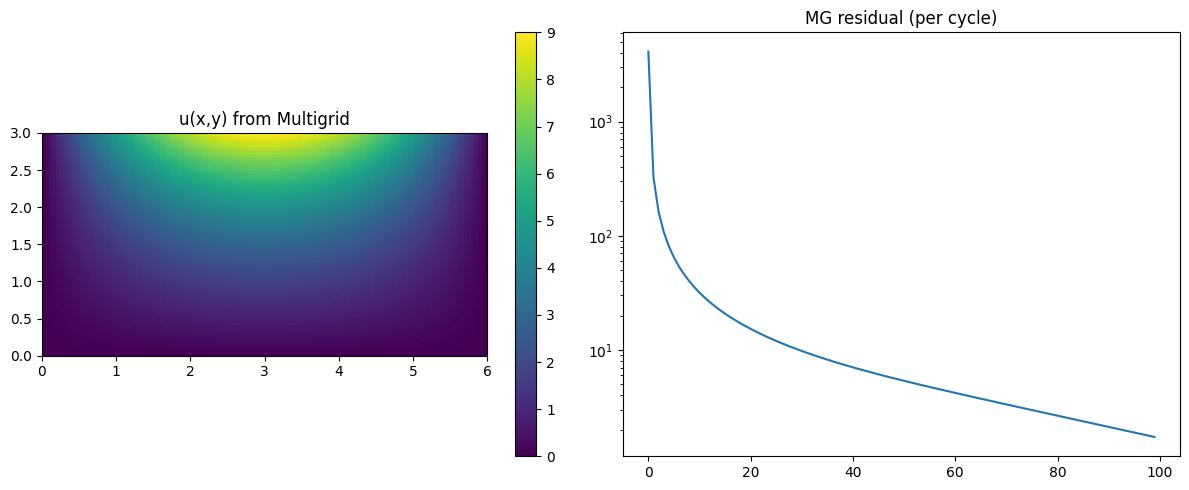

In [ ]:
#multigrid
import numpy as np
import matplotlib.pyplot as plt
import time, os
from scipy import sparse
from scipy.sparse.linalg import spsolve

def make_grid(nx, ny, Lx=6.0, Ly=3.0):
    x = np.linspace(0, Lx, nx)
    y = np.linspace(0, Ly, ny)
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    return x, y, dx, dy

def bc_example_factory(nx, ny, Lx=6.0, Ly=3.0):
    x = np.linspace(0, Lx, nx)
    def bc(i,j):
        if j == ny-1:
            return x[i] * (Lx - x[i])
        if i == 0 or i == nx-1 or j == 0:
            return 0.0
        return None
    return bc

def apply_dirichlet_bc(u, bc_func):
    nx, ny = u.shape
    for i in range(nx):
        for j in range(ny):
            val = bc_func(i,j)
            if val is not None:
                u[i,j] = val

def apply_A(u, dx, dy, i, j):
    return (u[i+1,j] - 2.0*u[i,j] + u[i-1,j]) / dx**2 + (u[i,j+1] - 2.0*u[i,j] + u[i,j-1]) / dy**2

def compute_residual(u, bc_func, dx, dy):
    nx, ny = u.shape
    r = np.zeros_like(u)
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            if bc_func(i,j) is None:
                r[i,j] = -apply_A(u, dx, dy, i, j)
    return r

def restrict_full_weighting(fine):
    nx, ny = fine.shape
    cx = (nx-1)//2 + 1
    cy = (ny-1)//2 + 1
    coarse = np.zeros((cx, cy))
    for I in range(cx):
        for J in range(cy):
            i = 2*I
            j = 2*J
            if i==0 or j==0 or i==nx-1 or j==ny-1:
                coarse[I,J] = fine[i,j]
            else:
                s = (4*fine[i,j] +
                     2*(fine[i-1,j] + fine[i+1,j] + fine[i,j-1] + fine[i,j+1]) +
                     (fine[i-1,j-1] + fine[i-1,j+1] + fine[i+1,j-1] + fine[i+1,j+1]))
                coarse[I,J] = s/16.0
    return coarse

def prolong_bilinear(coarse):
    cx, cy = coarse.shape
    fx = 2*(cx-1)+1
    fy = 2*(cy-1)+1
    fine = np.zeros((fx, fy))
    for I in range(cx):
        for J in range(cy):
            fine[2*I, 2*J] = coarse[I,J]
    for i in range(0, fx, 2):
        for j in range(1, fy, 2):
            left = fine[i, j-1] if j-1>=0 else 0.0
            right = fine[i, j+1] if j+1<fy else 0.0
            fine[i,j] = 0.5*(left + right)
    for i in range(1, fx, 2):
        for j in range(fy):
            up = fine[i-1, j] if i-1>=0 else 0.0
            down = fine[i+1, j] if i+1<fx else 0.0
            fine[i,j] = 0.5*(up + down)
    return fine
def sor_smoother(u, bc_func, dx, dy, omega=1.2, iterations=3):
    u = u
    nx, ny = u.shape
    hx2 = dx*dx; hy2 = dy*dy
    denom = 2.0*(1.0/hx2 + 1.0/hy2)
    for _ in range(iterations):
        for parity in (0,1):
            for i in range(1, nx-1):
                jstart = 1 + ((parity - i) % 2)
                for j in range(jstart, ny-1, 2):
                    if bc_func(i,j) is not None:
                        continue
                    rhs = (u[i+1,j]/hx2 + u[i-1,j]/hx2 + u[i,j+1]/hy2 + u[i,j-1]/hy2)
                    u[i,j] = (1-omega)*u[i,j] + (omega/denom)*rhs
    return u

def build_A_and_index(nx, ny, dx, dy):
    index_map = {}
    cnt = 0
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            index_map[(i,j)] = cnt
            cnt += 1
    if cnt == 0:
        return None, index_map
    rows = []; cols = []; data = []
    hx2 = dx*dx; hy2 = dy*dy
    for (i,j), k in index_map.items():
        rows.append(k); cols.append(k); data.append(-2.0*(1.0/hx2 + 1.0/hy2))
        for (ii,jj,coef) in [(i-1,j,1.0/hx2),(i+1,j,1.0/hx2),(i,j-1,1.0/hy2),(i,j+1,1.0/hy2)]:
            if (ii,jj) in index_map:
                rows.append(k); cols.append(index_map[(ii,jj)]); data.append(coef)
    A = sparse.csr_matrix((data, (rows, cols)), shape=(cnt, cnt))
    return A, index_map

def flatten_interior(u, index_map):
    N = len(index_map)
    v = np.zeros(N)
    for (i,j), k in index_map.items():
        v[k] = u[i,j]
    return v

def unflatten_to_grid(vec, template, index_map):
    u = template.copy()
    for (i,j), k in index_map.items():
        u[i,j] = vec[k]
    return u

def mg_cycle(u, bc_func, dx, dy, level, max_level, pre=3, post=3, omega=1.2):
    if level == max_level:
        nx, ny = u.shape
        A, idx = build_A_and_index(nx, ny, dx, dy)
        r = compute_residual(u, bc_func, dx, dy)
        if A is None or A.shape[0] == 0:
            return np.zeros_like(u)
        b = flatten_interior(r, idx)
        e_vec = spsolve(A, b)
        e_grid = unflatten_to_grid(e_vec, np.zeros_like(u), idx)
        return e_grid
    u = sor_smoother(u, bc_func, dx, dy, omega=omega, iterations=pre)

    r = compute_residual(u, bc_func, dx, dy)
    r_coarse = restrict_full_weighting(r)

    e_coarse_zero = np.zeros_like(r_coarse)
    e_coarse = mg_cycle(e_coarse_zero, bc_func, dx*2.0, dy*2.0, level+1, max_level, pre, post, omega)

    e_fine = prolong_bilinear(e_coarse)
    if e_fine.shape != u.shape:
        minx = min(e_fine.shape[0], u.shape[0]); miny = min(e_fine.shape[1], u.shape[1])
        u[:minx, :miny] += e_fine[:minx, :miny]
    else:
        u += e_fine
    apply_dirichlet_bc(u, bc_func)

    u = sor_smoother(u, bc_func, dx, dy, omega=omega, iterations=post)
    return u

def solve_multigrid(u0, bc_func, dx, dy, maxcycles=50, levels=4, tol=1e-6, verbose=True):
    u = u0.copy().astype(np.float64)
    residuals = []
    for k in range(maxcycles):
        res = compute_residual(u, bc_func, dx, dy)
        maxres = np.max(np.abs(res))
        residuals.append(maxres)
        if verbose:
            print(f"MG cycle {k}, residual {maxres:.3e}")
        if maxres < tol:
            break
        u = mg_cycle(u, bc_func, dx, dy, level=0, max_level=levels-1, pre=5, post=5, omega=1.2)
        apply_dirichlet_bc(u, bc_func)
    return u, residuals, k+1
def main():
    nx, ny = 129, 65
    Lx, Ly = 6.0, 3.0
    x, y, dx, dy = make_grid(nx, ny, Lx, Ly)
    bc_func = bc_example_factory(nx, ny, Lx, Ly)

    u0 = np.zeros((nx, ny), dtype=np.float64)
    apply_dirichlet_bc(u0, bc_func)

    os.makedirs("output", exist_ok=True)

    t0 = time.time()
    u_mg, res_mg, cycles = solve_multigrid(u0, bc_func, dx, dy, maxcycles=100, levels=4, tol=1e-6, verbose=True)
    t_elapsed = time.time() - t0

    np.save("output/u_mg.npy", u_mg)
    print(f"Multigrid done: cycles={cycles}, time={t_elapsed:.3f}s, final residual={res_mg[-1]:.3e}")

    fig, axs = plt.subplots(1,2, figsize=(12,5))
    im = axs[0].imshow(u_mg.T, origin='lower', extent=(0,Lx,0,Ly))
    axs[0].set_title("u(x,y) from Multigrid")
    fig.colorbar(im, ax=axs[0])
    axs[1].semilogy(res_mg)
    axs[1].set_title("MG residual (per cycle)")
    plt.tight_layout()
    plt.savefig("output/solutions_mg.png", dpi=200)
    plt.show()

if __name__ == "__main__":
    main()


روش ADI (Alternating Direction Implicit) برای حل معادلات مشتق جزئی دو‌بعدی

حل عددی معادلات مشتق‌جزئی بیضوی مانند معادلهٔ لاپلاس و پواسون،
به‌ویژه در حوزه‌هایی با شبکه‌های بزرگ، از نظر محاسباتی پرهزینه است.
روش‌های ساده‌ای مثل Jacobi یا Gauss–Seidel دارای همگرایی کندند و
روش‌های کاملاً ضمنی (Implicit 2D) نیازمند حل یک سیستم خطی بسیار بزرگ
در ابعاد
$$ N^2*N^2 $$
که این از نظر محاسباتی سنگین است.

روش Alternating Direction Implicit (ADI) یک روش قدرتمند برای حل چنین مسائل دو‌بعدی است.
این روش با تقسیم عملیات ضمنی به دو مرحلهٔ یک‌بعدی،
هزینهٔ محاسبه را در حد دو حل سه‌قطری ساده نگه می‌دارد.
همچنین پایداری عالی دارد (مشابه روش Crank–Nicolson).

برای حل معادلهٔ لاپلاس:

$$ ∇^2u=u_{xx}+u_{yy}=0 $$

روش ADI یک زمان مصنوعی t معرفی می‌کند و حل لاپلاس را به عنوان حالت پایدار معادلهٔ انتقال گرما در نظر می‌گیرد:

 $$ u_{xx}+u_{yy}=∂u/∂t $$

 وقتی زمان به بینهایت میل کند مشتق زمانی صفر شده و ما به همان معادله لاپلاس میرسیم.این ترفند اجازه می‌دهد تا با یک فرآیند تکاملی (Evolution) به حل بیضوی برسیم.

 در روش ADI، بازهٔ زمانی مصنوعی به گام‌های کوچک تقسیم می‌شود و هر گام زمانی به دو نیم‌گام تقسیم می‌شود

 نیم‌گام اول: ضمنی در جهت x

در این مرحله مشتق‌های مرتبهٔ دوم نسبت بهx به صورت ضمنی
و مشتق‌های نسبت به y به صورت صریح در نظر گرفته می‌شوند.

$$ (u^n-u^{*})/(Δt/2)=u_{xx}^{*}+u_{yy}^{n} $$

این معادله برای هر مقدار ثابت j (یعنی برای هر خط افقی)
به شکل یک سیستم سه‌قطری در راستای x درمی‌آید.

نیم‌گام دوم: ضمنی در جهت y
در این مرحله عکس عمل بالا انجام می‌شود:

$$ (u^{*}-u^{n+1})/(Δt/2)=u_{xx}^{*}+u_{yy}^{n+1} $$

این معادله برای هر مقدار ثابت i (برای هر ستون عمودی)
یک سیستم سه‌قطری در راستای y تولید می‌کند.

چرا ADI سریع است؟
در هر نیم‌گام فقط یکی از جهت‌های مشتق دوم به صورت ضمنی ظاهر می‌شود.
این باعث می‌شود معادلهٔ دوبعدی به دو معادلهٔ یک‌بعدی تبدیل شود.

شکل گسسته شدهٔ معادلات
برای شبکهٔ یکنواخت:
Δx=Δy=h
مشتق‌ها به صورت گسسته:

$$ u_{xx}(i,j)=(u_{i+1,j}-2u_{i,j}+u_{i-1,j})/h^{2} $$
$$ u_{yy}(i,j)=(u_{i,j+1}-2u_{i,j}+u_{i,j-1})/h^{2} $$

در نیم‌گام اول (ضمنی در x)، برای هر j:

$$ -αu_{i-1,j}^{*}+(1+2α)u_{i,j}^{*}-αu_{i+1,j}^{*}=u_{i,j}^{n}+α(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}) $$
$$ α=Δt​/2h^{2} $$

این یک سیستم خطی سه‌قطری است.
در نیم‌گام دوم مشابه همین رابطه به دست می‌آید اما در راستای y.

ارتباط ADI با روش توماس (Thomas Algorithm)

روش توماس نسخهٔ ساده‌شدهٔ روش گاوس–حذف برای ماتریس‌های سه‌قطری است.

هر نیم‌گام ADI شامل حل یک سیستم خطی از این فرم است:

$$ a_{i}u_{i-1}+b_{i}u_{i}+c_{i}u{i+1}=d_{i} $$

در هر مرحلهٔ ADI، ماتریس خطی که باید حل شود دقیقاً این شکل را دارد:

$$
\begin{pmatrix}
b_{1} & c_{1} & 0 & 0 & \cdots & 0 \\
a_{2} & b_{2} & c_{2} & 0 & \cdots & 0 \\
0 & a_{3} & b_{3} & c_{3} & \cdots & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
0 & \cdots & 0 & a_{n-1} & b_{n-1} & c_{n-1} \\
0 & \cdots & 0 & 0 & a_{n} & b_{n} \\
\end{pmatrix}
\begin{pmatrix}
u_{1} \\
u_{2} \\
u_{3} \\
\vdots \\
u_{n-1} \\
u_{n} \\
\end{pmatrix}
=
\begin{pmatrix}
d_{1} \\
d_{2} \\
d_{3} \\
\vdots \\
d_{n-1} \\
d_{n} \\
\end{pmatrix}
$$

در نیم‌گام اول ضرایب به این شکل اند:
$$ a_{i}=-r_{x} , b_{i}=1+2r_{x} , c_{i}=-r_{x} $$
$$ d_{i}=(1-2r_{y})u_{i,j}+r_{y}(u_{i,j+1}+u_{i,j-1}) $$
یعنی ماتریس توماس برای نیم‌گام x دقیقاً این است:

$$
\begin{pmatrix}
1+2r_{x} & -r_{x} & 0 & \cdots & 0 \\
-r_{x} & 1+2r_{x} & -r_{x} & \cdots & 0 \\
0 & -r_{x} & 1+2r_{x} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & -r_{x} \\
0 & 0 & 0 & -r_{x} & 1+2r_{x} \\
\end{pmatrix}
$$



چون ضرایب فقط روی سه قطر زیر، اصلی، و بالا قرار می‌گیرند،
این سیستم را می‌توان با روش توماس در زمان خطی O(N) حل کرد.
ADI بدون روش توماس عملاً ممکن نیست،
زیرا در هر نیم‌گام باید تعداد زیادی سیستم سه‌قطری حل شود.

ADI iter 0, max change=2.250e+00, laplace-res=1.526e+03
ADI iter 1, max change=8.380e-01, laplace-res=8.023e+02
ADI iter 2, max change=4.406e-01, laplace-res=6.131e+02
ADI iter 3, max change=3.367e-01, laplace-res=4.777e+02
ADI iter 4, max change=2.624e-01, laplace-res=3.819e+02
ADI iter 50, max change=2.147e-02, laplace-res=3.831e+01
ADI iter 100, max change=1.061e-02, laplace-res=1.913e+01
ADI iter 150, max change=6.986e-03, laplace-res=1.263e+01
ADI iter 200, max change=5.175e-03, laplace-res=9.373e+00
ADI iter 250, max change=4.087e-03, laplace-res=7.410e+00
ADI iter 300, max change=3.361e-03, laplace-res=6.097e+00
ADI iter 350, max change=2.843e-03, laplace-res=5.161e+00
ADI iter 400, max change=2.456e-03, laplace-res=4.458e+00
ADI iter 450, max change=2.153e-03, laplace-res=3.910e+00
ADI iter 500, max change=1.911e-03, laplace-res=3.471e+00
ADI iter 550, max change=1.713e-03, laplace-res=3.112e+00
ADI iter 600, max change=1.547e-03, laplace-res=2.812e+00
ADI iter 650, max change=

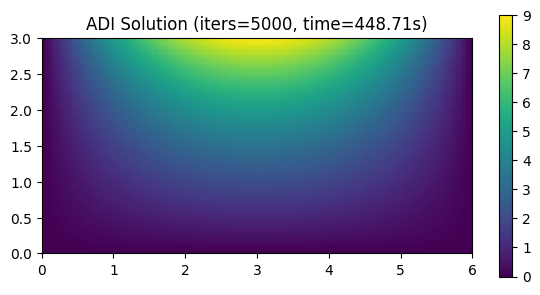

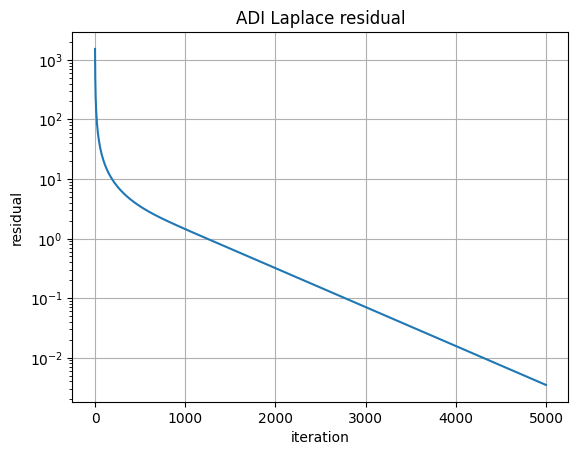

In [ ]:
#ADI
import numpy as np
import matplotlib.pyplot as plt
import time
import os

def make_grid(nx, ny, Lx=6.0, Ly=3.0):
    x = np.linspace(0, Lx, nx)
    y = np.linspace(0, Ly, ny)
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    return x, y, dx, dy

def bc_example_factory(nx, ny, Lx=6.0, Ly=3.0):
    x = np.linspace(0, Lx, nx)
    def bc(i,j):
        if j == ny-1:
            return x[i] * (Lx - x[i])
        if i == 0 or i == nx-1 or j == 0:
            return 0.0
        return None
    return bc

def apply_dirichlet_bc(u, bc_func):
    nx, ny = u.shape
    for i in range(nx):
        for j in range(ny):
            val = bc_func(i,j)
            if val is not None:
                u[i,j] = val

def apply_A(u, dx, dy, i, j):
    return (u[i+1,j] - 2.0*u[i,j] + u[i-1,j]) / dx**2 + (u[i,j+1] - 2.0*u[i,j] + u[i,j-1]) / dy**2

def compute_residual(u, bc_func, dx, dy):
    nx, ny = u.shape
    r = np.zeros_like(u)
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            if bc_func(i,j) is not None:
                r[i,j] = 0.0
            else:
                r[i,j] = -apply_A(u, dx, dy, i, j)
    return r

def tridiag_solve(a, b, c, d):
    n = len(b)
    cp = np.empty(n-1)
    dp = np.empty(n)
    cp[0] = c[0]/b[0]
    dp[0] = d[0]/b[0]
    for i in range(1, n-1):
        denom = b[i] - a[i-1]*cp[i-1]
        cp[i] = c[i]/denom
        dp[i] = (d[i] - a[i-1]*dp[i-1])/denom
    dp[n-1] = (d[n-1] - a[n-2]*dp[n-2])/(b[n-1] - a[n-2]*cp[n-2])
    x = np.empty(n)
    x[-1] = dp[-1]
    for i in range(n-2, -1, -1):
        x[i] = dp[i] - cp[i]*x[i+1]
    return x

def solve_adi_heat(u0, bc_func, dx, dy, dt=None, maxiter=10000, tol=1e-8, verbose=False):
    u = u0.copy()
    nx, ny = u.shape
    if dt is None:
        dt = 0.5 * min(dx*dx, dy*dy)
    rx = dt / (2.0 * dx * dx)
    ry = dt / (2.0 * dy * dy)

    ax = -rx * np.ones(nx-3)
    cx = -rx * np.ones(nx-3)
    bx = (1.0 + 2.0*rx) * np.ones(nx-2)

    ay = -ry * np.ones(ny-3)
    cy = -ry * np.ones(ny-3)
    by = (1.0 + 2.0*ry) * np.ones(ny-2)

    residuals = []
    for it in range(maxiter):
        maxdiff = 0.0
        u_star = u.copy()
        for j in range(1, ny-1):
            rhs = np.zeros(nx-2)
            for idx, i in enumerate(range(1, nx-1)):
                if bc_func(i,j) is not None:
                    rhs[idx] = 0.0
                else:
                    rhs[idx] = (1.0 - 2.0*ry) * u[i,j] + ry*(u[i,j+1] + u[i,j-1])
            rhs[0] += rx * u[0,j]
            rhs[-1] += rx * u[-1,j]

            sol = tridiag_solve(ax, bx, cx, rhs)
            for idx, i in enumerate(range(1, nx-1)):
                maxdiff = max(maxdiff, abs(sol[idx] - u[i,j]))
                u_star[i,j] = sol[idx]

        apply_dirichlet_bc(u_star, bc_func)
        u_new = u_star.copy()
        for i in range(1, nx-1):
            rhs = np.zeros(ny-2)
            for idx, j in enumerate(range(1, ny-1)):
                if bc_func(i,j) is not None:
                    rhs[idx] = 0.0
                else:
                    rhs[idx] = (1.0 - 2.0*rx) * u_star[i,j] + rx*(u_star[i+1,j] + u_star[i-1,j])
            rhs[0] += ry * u_star[i,0]
            rhs[-1] += ry * u_star[i,-1]

            sol = tridiag_solve(ay, by, cy, rhs)
            for idx, j in enumerate(range(1, ny-1)):
                maxdiff = max(maxdiff, abs(sol[idx] - u_star[i,j]))
                u_new[i,j] = sol[idx]

        apply_dirichlet_bc(u_new, bc_func)
        res = compute_residual(u_new, bc_func, dx, dy)
        maxres = np.max(np.abs(res))
        residuals.append(maxres)

        if verbose and (it % 50 == 0 or it < 5):
            print(f"ADI iter {it}, max change={maxdiff:.3e}, laplace-res={maxres:.3e}")

        u = u_new

        if maxres < tol:
            if verbose:
                print(f"ADI converged in {it+1} iterations")
            break

    return u, residuals, it+1

def run_adi_demo():
    nx, ny = 129, 65
    Lx, Ly = 6.0, 3.0

    x, y, dx, dy = make_grid(nx, ny, Lx, Ly)
    bc_func = bc_example_factory(nx, ny, Lx, Ly)

    u0 = np.zeros((nx, ny))
    apply_dirichlet_bc(u0, bc_func)

    os.makedirs("output_adi", exist_ok=True)

    t0 = time.time()
    u_adi, res_adi, it_adi = solve_adi_heat(
        u0, bc_func, dx, dy,
        dt=None, maxiter=5000, tol=1e-6, verbose=True
    )
    t_adi = time.time() - t0
    np.save("output_adi/u_adi.npy", u_adi)

    print(f"ADI time = {t_adi:.3f} s, iterations = {it_adi}")

    plt.figure(figsize=(6,3))
    plt.imshow(u_adi.T, origin='lower', extent=(0,Lx,0,Ly))
    plt.colorbar()
    plt.title(f"ADI Solution (iters={it_adi}, time={t_adi:.2f}s)")
    plt.tight_layout()
    plt.savefig("output_adi/adi_solution.png", dpi=200)
    plt.show()

    plt.figure()
    plt.semilogy(res_adi)
    plt.title("ADI Laplace residual")
    plt.xlabel("iteration")
    plt.ylabel("residual")
    plt.grid(True)
    plt.savefig("output_adi/adi_residual.png", dpi=200)
    plt.show()


if __name__ == "__main__":
    run_adi_demo()


روش SOR در بخش دیگر پروژه به شکل کامل توضیح داده شده است

SOR iter 0, max update=8.596e+00
SOR iter 1, max update=7.095e+00
SOR iter 2, max update=6.610e+00
SOR iter 3, max update=6.008e+00
SOR iter 4, max update=5.140e+00
SOR iter 5, max update=4.847e+00
SOR iter 6, max update=4.431e+00
SOR iter 7, max update=3.841e+00
SOR iter 8, max update=3.750e+00
SOR iter 9, max update=3.336e+00
SOR iter 200, max update=1.297e-05
SOR converged in 244 iters, max update=9.894e-07
SOR time = 14.808 s, iterations = 244


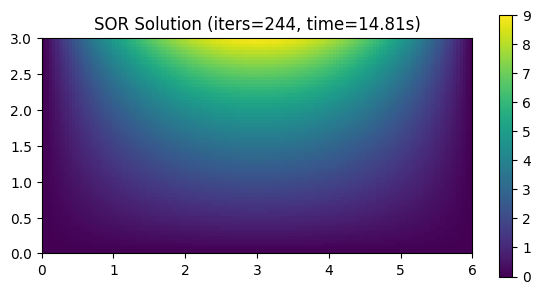

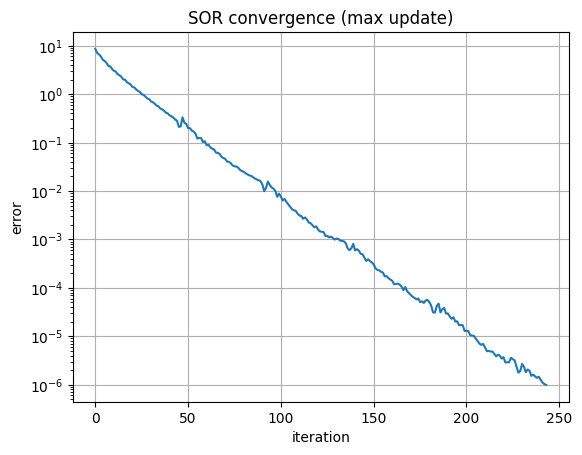

In [ ]:
#SOR
import numpy as np
import matplotlib.pyplot as plt
import time
import os


def make_grid(nx, ny, Lx=6.0, Ly=3.0):
    x = np.linspace(0, Lx, nx)
    y = np.linspace(0, Ly, ny)
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    return x, y, dx, dy

def bc_example_factory(nx, ny, Lx=6.0, Ly=3.0):
    x = np.linspace(0, Lx, nx)
    def bc(i,j):
        if j == ny-1:
            return x[i] * (Lx - x[i])
        if i == 0 or i == nx-1 or j == 0:
            return 0.0
        return None
    return bc

def apply_dirichlet_bc(u, bc_func):
    nx, ny = u.shape
    for i in range(nx):
        for j in range(ny):
            val = bc_func(i,j)
            if val is not None:
                u[i,j] = val
def apply_A(u, dx, dy, i, j):
    return (u[i+1,j] - 2.0*u[i,j] + u[i-1,j]) / dx**2 + (u[i,j+1] - 2.0*u[i,j] + u[i,j-1]) / dy**2

def compute_residual(u, bc_func, dx, dy):
    nx, ny = u.shape
    r = np.zeros_like(u)
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            if bc_func(i,j) is not None:
                r[i,j] = 0.0
            else:
                r[i,j] = -apply_A(u, dx, dy, i, j)
    return r

def solve_sor(u0, bc_func, dx, dy, omega=1.9, maxiter=20000, tol=1e-8, verbose=False):
    u = u0.copy()
    nx, ny = u.shape
    hx2 = dx*dx
    hy2 = dy*dy
    denom = 2.0*(1.0/hx2 + 1.0/hy2)
    residuals = []
    for it in range(maxiter):
        maxdiff = 0.0
        for parity in (0,1):
            for i in range(1, nx-1):
                jstart = 1 + ((parity - i) % 2)
                for j in range(jstart, ny-1, 2):
                    if bc_func(i,j) is not None:
                        continue
                    rhs = (u[i+1,j]/hx2 + u[i-1,j]/hx2 +
                           u[i,j+1]/hy2 + u[i,j-1]/hy2)
                    newu = (1-omega)*u[i,j] + (omega/denom)*rhs
                    diff = abs(newu - u[i,j])
                    if diff > maxdiff:
                        maxdiff = diff
                    u[i,j] = newu
        residuals.append(maxdiff)
        if verbose and (it % 200 == 0 or it < 10):
            print(f"SOR iter {it}, max update={maxdiff:.3e}")
        if maxdiff < tol:
            if verbose:
                print(f"SOR converged in {it+1} iters, max update={maxdiff:.3e}")
            break
    return u, residuals, it+1

def run_sor_demo():
    nx, ny = 129, 65
    Lx, Ly = 6.0, 3.0
    x, y, dx, dy = make_grid(nx, ny, Lx, Ly)
    bc_func = bc_example_factory(nx, ny, Lx, Ly)

    u0 = np.zeros((nx, ny))
    apply_dirichlet_bc(u0, bc_func)

    os.makedirs("output_sor", exist_ok=True)
    t0 = time.time()
    u_sor, res_sor, it_sor = solve_sor(
        u0, bc_func, dx, dy,
        omega=1.94, maxiter=20000, tol=1e-6, verbose=True
    )
    t_sor = time.time() - t0
    np.save("output_sor/u_sor.npy", u_sor)

    print(f"SOR time = {t_sor:.3f} s, iterations = {it_sor}")

    plt.figure(figsize=(6,3))
    plt.imshow(u_sor.T, origin='lower', extent=(0,Lx,0,Ly))
    plt.colorbar()
    plt.title(f"SOR Solution (iters={it_sor}, time={t_sor:.2f}s)")
    plt.tight_layout()
    plt.savefig("output_sor/sor_solution.png", dpi=200)
    plt.show()


    plt.figure()
    plt.semilogy(res_sor)
    plt.title("SOR convergence (max update)")
    plt.xlabel("iteration")
    plt.ylabel("error")
    plt.grid(True)
    plt.savefig("output_sor/sor_convergence.png", dpi=200)
    plt.show()


if __name__ == "__main__":
    run_sor_demo()


منابع:

Peaceman, D. W. & Rachford, H. H., Jr. — “The numerical solution of parabolic and elliptic differential equations” (J. SIAM, 1955)

Douglas, J. & Gunn, J. E. — “A general formulation of alternating direction methods” (Numerische Mathematik, 1964)

An Introduction to Multigrid Methods — P. Wesseling